# 13.2.4.4c Ejemplo: MLP para regresión (MLP)

**Entrada:** $\;$ vector de $9$ dimensiones, 6 reales y 3 binarias, estandarizado

**Capas ocultas:** $\;$ dos capas de $64$ unidades ReLU

**Salida:** $\;$ una unidad lineal

In [1]:
import numpy as np; import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names, na_values={'horsepower': '?'})
data.drop('car_name', axis=1, inplace=True) # no usamos car_name para predecir
data.dropna(inplace=True) # eliminamos los seis casos sin horsepower 
data = data.astype({'cylinders': np.float64, 'model_year': np.float64, 'origin': 'category'})
data['origin'] = data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.concat([data, pd.get_dummies(data.origin, prefix='', prefix_sep='')], axis=1)
data.drop('origin', axis=1, inplace=True); y = data.pop('mpg'); X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler(); X_train = scaler.fit_transform(X_train); X_test = scaler.transform(X_test);

In [5]:
import tensorflow as tf; from tensorflow import keras
mlp = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[X_train.shape[1]]),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)])
mlp.compile(loss='mean_squared_error', optimizer='adam')
mlp.fit(X_train, y_train, epochs=100, verbose=0)
y_train_pred = mlp.predict(X_train); y_test_pred = mlp.predict(X_test)

4/4 [==============================] - 0s 2ms/step


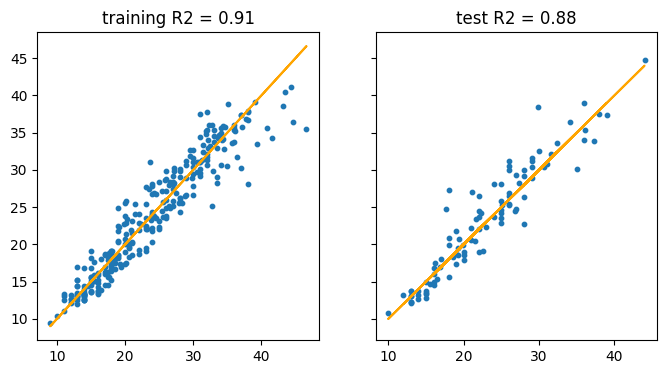

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred); r2_test = r2_score(y_test, y_test_pred)
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey = 'all')
axes[0].set_title(f'training R2 = {r2_train:.2f}')
axes[0].scatter(y_train, y_train_pred, s=10)
axes[0].plot(y_train, y_train, color='orange')
axes[1].set_title(f'test R2 = {r2_test:.2f}')
axes[1].scatter(y_test, y_test_pred, s=10)
axes[1].plot(y_test, y_test, color='orange');